# Imports

In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.base import TransformerMixin

In [4]:
from sklearn.pipeline import Pipeline

In [5]:
import pandas as pd

In [6]:
import re

In [7]:
import nltk

In [8]:
import pickle

In [9]:
import string

In [10]:
import numpy as np

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, accuracy_score, plot_confusion_matrix

In [13]:
import spacy

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
import matplotlib.pyplot as plt

Uncomment this line if you do not have the en_core_web_lg spacy module downloaded.

In [16]:
# !python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [17]:
nlp = spacy.load('en_core_web_lg')

In [18]:
# from google.colab import files

# Data Reading

In [19]:
#since we're using google colab to run the files, we can import the data after an upload
# uploaded = files.upload()

Saving us_election_2020_1st_presidential_debate.csv to us_election_2020_1st_presidential_debate.csv


In [56]:
df = pd.read_csv('us_election_2020_1st_presidential_debate.csv').drop('minute', axis=1)

In [57]:
df.shape

(789, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  789 non-null    object
 1   text     789 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


# Test processing & Cleaning

In [59]:
def read_clean(text):
    '''
    Makes text lowercase, without punctuations, numbers removed and both numbers with letters next to it too.
    Input: 
        text: string type
    Output:
        text: a transformed string in lowercase, without punctuations etc.
    '''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('w*\d\w', '', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [60]:
df['text'] = df['text'].apply(read_clean)
df['speaker'].unique()

array(['Chris Wallace', 'Vice President Joe Biden',
       'President Donald J. Trump', 'Chris Wallace:'], dtype=object)

# Tokening the data with ```spacy```.

Here we create a custom tokenizer function using `spacy`. Any text cleaning that was not done using the above regex expression such as removing stopwords cna be done here. 

In [61]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Create our list of punctuation marks
punctuations = string.punctuation

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens


In [62]:
df['text'] = df['text'].apply(spacy_tokenizer)
#remove empty lists
df = df[df.astype(str)['text'] != '[]']
df.head()

,speaker,text
0,Chris Wallace,"[good, evening, health, education, campus, cas..."
1,Chris Wallace,"[debate, conducted, health, safety, protocols,..."
2,Vice President Joe Biden,[man]
4,Vice President Joe Biden,[m]
5,Chris Wallace,"[gentlemen, lot, people, waiting, night, let, ..."


In [63]:
df['speaker'] = df['speaker'].apply(lambda x: x.replace(':', ''))

In [64]:
instances = df['speaker'].value_counts()
instances

President Donald J. Trump    299
Vice President Joe Biden     237
Chris Wallace                216
Name: speaker, dtype: int64

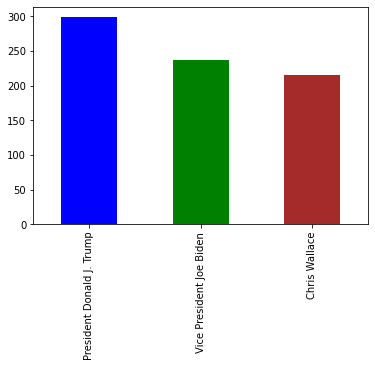

In [65]:
#visualize the speakers using a bar graph
instances.plot(kind='bar', color=['blue','green','brown']);

# WordCloud. 

In [66]:
text = ''.join(map(str, df['text']))
text

"['good', 'evening', 'health', 'education', 'campus', 'case', 'western', 'reserve', 'university', 'cleveland', 'clinic', 'm', 'fox', 'news', 'welcome', 'presidential', 'debates', 'donald', 'debate', 'sponsored', 'commission', 'presidential', 'debates', 'commission', 'designed', 'format', 'roughly', 'minute', 'segments', 'minute', 'answers', 'candidate', 'question', 'open', 'discussion', 'rest', 'segment', 'campaigns', 'agreed', 'rules', 'record', 'decided', 'topics', 'questions', 'topic', 'assure', 'questions', 'shared', 'commission', 'candidates']['debate', 'conducted', 'health', 'safety', 'protocols', 'designed', 'cleveland', 'clinic', 'serving', 'health', 'security', 'advisor', 'commission', 'debates', 'precaution', 'campaigns', 'agreed', 'candidates', 'shake', 'hands', 'beginning', 'tonight', 's', 'debate', 'audience', 'hall', 'promised', 'remain', 'silent', 'cheers', 'boos', 'interruptions', 'importantly', 'focus', 'candidates', 'noise', 'right', 'welcome', 'republican', 'nominee'

In [67]:
#limit the word count and set the stopwords
wordcount = 5000

stop_words.update(['joe', 'biden','donal','j', 'vice',"president'",'trump','chris','wallace'])

In [76]:
# setup, generate and save the word cloud image to a file

def draw_cloud(text):
    text = ''.join(map(str, text))
    wc = WordCloud(scale=5, 
                background_color="grey", 
                max_words=wordcount, 
                stopwords=stop_words)
    wc.generate(text)
    wc.to_file("WordCloud.png")

    # show the wordcloud as output
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    plt.axis("off")
    return plt.show()

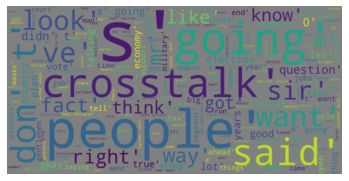

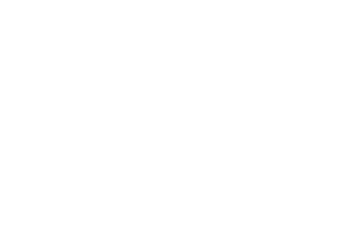

In [77]:
draw_cloud(df['text'])

People seems to be the most commonly used word as from the word cloud above. After perfoming a sentiment analysis, we will create different sets for each of the 

# Summary Statistics

In [74]:
# print the debate word count
print("Word count debete:")
len(text)

Word count debete:


71991

# DataFrame Per Speaker

In [69]:
trump_df = df[df['speaker']=='President Donald J. Trump']
trump_df.head()

,speaker,text
6,President Donald J. Trump,"[thank, tell, simply, won, election, elections..."
7,President Donald J. Trump,"[won, election, right, choose, people, knowing..."
10,President Donald J. Trump,[thank]
14,President Donald J. Trump,"[aren, t, million, people, preexisting, condit..."
16,President Donald J. Trump,"[period, time, period, time, opening, m, elect..."


In [70]:
joe_df = df[df['speaker']=='Vice President Joe Biden']
joe_df.head()

,speaker,text
2,Vice President Joe Biden,[man]
4,Vice President Joe Biden,[m]
9,Vice President Joe Biden,"[thank, looking, forward, mr]"
11,Vice President Joe Biden,"[american, people, right, supreme, court, nomi..."
12,Vice President Joe Biden,"[s, stake, s, clear, wants, rid, affordable, c..."


In [75]:
chris_df = df[df['speaker']=='Chris Wallace']
chris_df.head()

,speaker,text
0,Chris Wallace,"[good, evening, health, education, campus, cas..."
1,Chris Wallace,"[debate, conducted, health, safety, protocols,..."
5,Chris Wallace,"[gentlemen, lot, people, waiting, night, let, ..."
8,Chris Wallace,"[thank, question, minutes]"
19,Chris Wallace,"[gentlemen, open, discussion]"


# Wordcloud Per Speaker

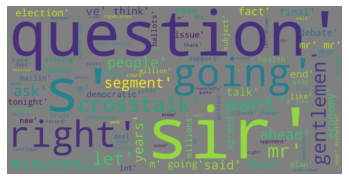

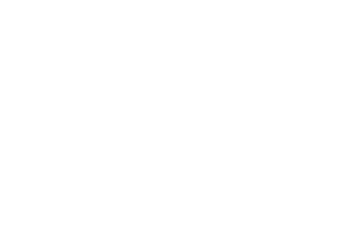

In [78]:
# Chris Wallace WordCloud
draw_cloud(chris_df['text'])

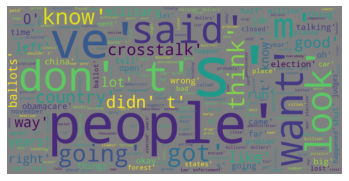

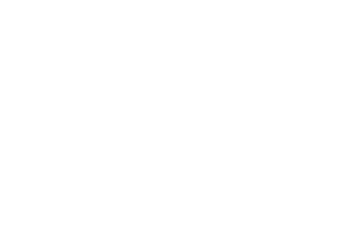

In [79]:
# Donald Trumps WordCloud
draw_cloud(trump_df['text'])

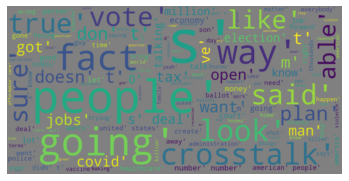

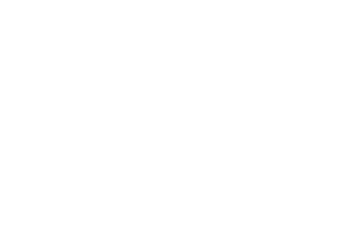

In [80]:
#Joe biden's Cloud
draw_cloud(joe_df['text'])

# Sentiment Analysis

In [81]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [83]:
sid = SentimentIntensityAnalyzer()

Remove rows with empty lists after removing stopwords. 

In [84]:
df.dropna(inplace=True)




Polarity of the dataframe

In [98]:
#join the texts first.
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)
df['text'] = df['text'].apply(convert_list_to_string)


In [100]:
df['scores'] = df['text'].apply(lambda txt: sid.polarity_scores(txt))
df.head()

,speaker,text,scores
0,Chris Wallace,good evening health education campus case west...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
1,Chris Wallace,debate conducted health safety protocols desig...,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'co..."
2,Vice President Joe Biden,man,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Vice President Joe Biden,m,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
5,Chris Wallace,gentlemen lot people waiting night let s going...,"{'neg': 0.159, 'neu': 0.633, 'pos': 0.208, 'co..."


In [101]:
df['compound'] = df['scores'].apply(lambda dic: dic['compound'])
df.head()

,speaker,text,scores,compound
0,Chris Wallace,good evening health education campus case west...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.8957
1,Chris Wallace,debate conducted health safety protocols desig...,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'co...",0.9153
2,Vice President Joe Biden,man,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Vice President Joe Biden,m,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
5,Chris Wallace,gentlemen lot people waiting night let s going...,"{'neg': 0.159, 'neu': 0.633, 'pos': 0.208, 'co...",0.4588


In [102]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')
df.head()

,speaker,text,scores,compound,comp_score
0,Chris Wallace,good evening health education campus case west...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.8957,pos
1,Chris Wallace,debate conducted health safety protocols desig...,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'co...",0.9153,pos
2,Vice President Joe Biden,man,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,Vice President Joe Biden,m,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,pos
5,Chris Wallace,gentlemen lot people waiting night let s going...,"{'neg': 0.159, 'neu': 0.633, 'pos': 0.208, 'co...",0.4588,pos


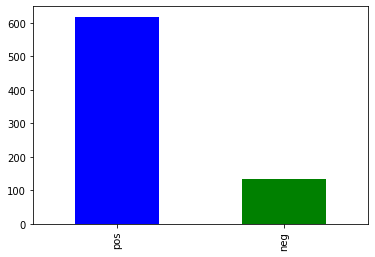

In [108]:
scores = df['comp_score'].value_counts()
scores.plot(kind='bar', color=['blue','green']);

As clearly noted, one could guess that each speaker would try as much as possible to use positive sentiments to avoid a bad impression of Himself during the debate. 